In [1]:
%%html
<style>
.cell-output-ipywidget-background {
    background-color: transparent !important;
}
:root {
    --jp-widgets-color: var(--vscode-editor-foreground);
    --jp-widgets-font-size: var(--vscode-editor-font-size);
}  
</style>

In [2]:
import datetime
import pyaurorax

aurorax = pyaurorax.PyAuroraX()
at = aurorax.tools

at.set_theme("dark")

In [3]:
# download an hour of THEMIS ASI data
dataset_name = "THEMIS_ASI_RAW"
start_dt = datetime.datetime(2021, 11, 4, 9, 0)
end_dt = datetime.datetime(2021, 11, 4, 9, 59)
site_uid = "atha"
r = aurorax.data.ucalgary.download(dataset_name, start_dt, end_dt, site_uid=site_uid)

In [4]:
# read in the hour of data
data = aurorax.data.ucalgary.read(r.dataset, r.filenames, n_parallel=5)

In [5]:
import numpy as np

In [6]:
# scale all the images
#
# NOTE: you can scale all images or just one image
images_scaled = at.scale_intensity(data.data, min=1000, max=10000)

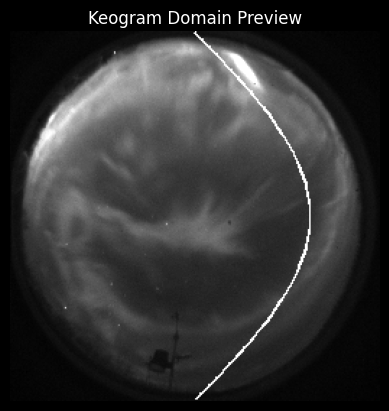

In [7]:
# Define a curve in ccd_space
ccd_y = np.linspace(0, 255, 50)
ccd_x = 127.5 + 80 * np.sin(np.pi * ccd_y / 255)

custom_keogram = at.keogram.create_custom(images_scaled,
                                          data.timestamp,
                                          coordinate_system='ccd',
                                          width=2,  
                                          x_locs=ccd_x, 
                                          y_locs=ccd_y,
                                          preview=True)

/home/josh/pyaurorax/pyaurorax/tools/classes/keogram.py:364: UserWarning: Unable to plot y-axis. If this keogram object was create as part of the custom_keogram routines, this is expected and plotting a custom keogram with axes is not supported at this time.
  warnings.warn(


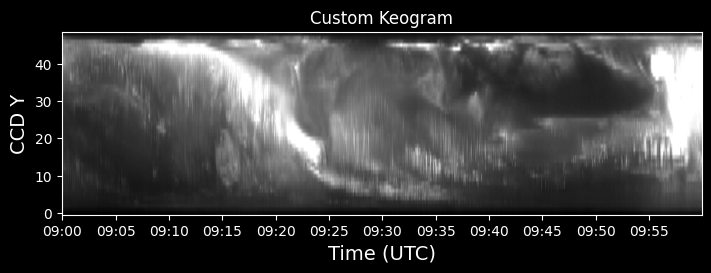

In [8]:
custom_keogram.plot(title="Custom Keogram", aspect=7, cmap="gray")

### **Custom Keogram in Lat/Lon Space**

In [9]:
# First, download and read an hour of TREx RGB Data
site_uid = "gill"
dataset_name = "TREX_RGB_RAW_NOMINAL"
start_dt = datetime.datetime(2021, 11, 4, 3, 0)
end_dt = datetime.datetime(2021, 11, 4, 3, 59)
r = aurorax.data.ucalgary.download(dataset_name, start_dt, end_dt, site_uid=site_uid)
rgb_data = aurorax.data.ucalgary.read(r.dataset, r.filenames, n_parallel=5)

# Grab the corresponding skymap
dataset_name = "TREX_RGB_SKYMAP_IDLSAV"
r = aurorax.data.ucalgary.download_best_skymap(dataset_name, site_uid, start_dt)
skymap_data = aurorax.data.ucalgary.read(r.dataset, r.filenames)

rgb_images = at.scale_intensity(rgb_data.data, min=15, max=110)
rgb_skymap = skymap_data.data[0]

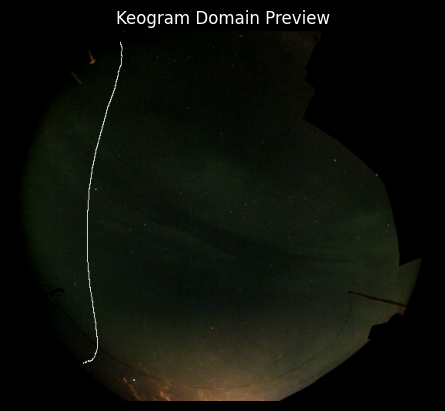

In [10]:
latitudes = np.linspace(51.0, 62.0, 50)
longitudes = -102.0 + 5 * np.sin(np.pi * (latitudes - 51.0) / (62.0 - 51.0))

geo_keo = at.keogram.create_custom(rgb_images,
                                   data.timestamp,
                                   coordinate_system='geo',
                                   width=2,          
                                   x_locs=longitudes, 
                                   y_locs=latitudes,
                                   preview=True,
                                   altitude_km=115,
                                   skymap=rgb_skymap,
                                   metric="median")

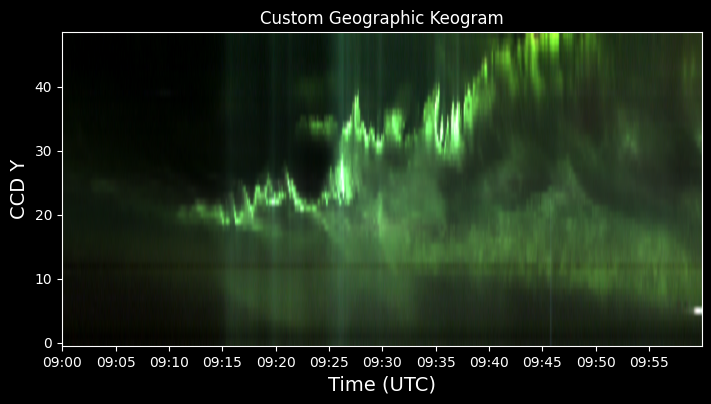

In [11]:
geo_keo.plot(title="Custom Geographic Keogram", aspect=12, cmap="gray")